**Roujia Zhong & Luhang Sun**

Fall 2020

CS343: Neural Networks

Project 3: Convolutional Neural Networks

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
from PIL import Image

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=3)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1: Single channel 2D Convolution (Grayscale image filtering)

As the name suggests, a critical component of a convolutional neural network is the **convolution** operation. We're going to start by implementing a function in `filter_ops.py` that convolves an image with a filter. You will make use of this function when you build the convolutional net next week. We'll make several versions of the function to help with the debugging, gradually adding complexity.

First, implement `conv2_gray` according to the specifications in the comments. Run the following code to test your implementation

### 1a. Single kernel synthetic data tests

In [2]:
from filter_ops import conv2_gray

#### Test: Single kernel, odd image size

In [3]:
# Create test 'staircase' pattern 0-10 across the column dimension and replicate across rows
test_num_cols = 7
test_img = np.tile(1 + np.arange(0, test_num_cols), (test_num_cols, 1))

# Single uniform (normalized) averaging kernel
test_ker_sz = 2
test_ker = np.ones([1, test_ker_sz, test_ker_sz])
test_ker /= test_ker.sum()
print(f'test img shape is {test_img.shape} and test ker shape is {test_ker.shape}')
print(f'test img looks like:\n{test_img}\nand test ker looks like\n{test_ker}')

test img shape is (7, 7) and test ker shape is (1, 2, 2)
test img looks like:
[[1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]
 [1 2 3 4 5 6 7]]
and test ker looks like
[[[0.25 0.25]
  [0.25 0.25]]]


In [4]:
test_out_img = conv2_gray(test_img, test_ker, verbose=True)
print(f'Your filtered image shape is {test_out_img.shape} and it should be (1, 7, 7)')
print(f'Here is your filtered image:')
print('------------------------------------')
print(test_out_img[0])
print('------------------------------------')
print(f'Here is what it should look like:')
print('------------------------------------')
print(sp.convolve2d(test_img, test_ker[0], mode='same'))
print('------------------------------------')

img_x=7, img_y=7
n_kers=1, ker_x=2, ker_y=2
Your filtered image shape is (1, 7, 7) and it should be (1, 7, 7)
Here is your filtered image:
------------------------------------
[[0.25 0.75 1.25 1.75 2.25 2.75 3.25]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]]
------------------------------------
Here is what it should look like:
------------------------------------
[[0.25 0.75 1.25 1.75 2.25 2.75 3.25]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5 ]]
------------------------------------


#### Test: Single kernel, even image size

In [5]:
# Create test 'staircase' pattern 0-10 across the column dimension and replicate across rows
test_num_cols = 8
test_img = np.tile(1 + np.arange(0, test_num_cols), (test_num_cols, 1))
print(f'test img shape is {test_img.shape} and test ker shape is {test_ker.shape}')
print(f'test img looks like:\n{test_img}\nand test ker looks like\n{test_ker}')

test img shape is (8, 8) and test ker shape is (1, 2, 2)
test img looks like:
[[1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]]
and test ker looks like
[[[0.25 0.25]
  [0.25 0.25]]]


In [6]:
test_out_img = conv2_gray(test_img, test_ker, verbose=True)
print(f'Your filtered image shape is {test_out_img.shape} and it should be (1, 8, 8)')
print(f'Here is your filtered image:')
print('------------------------------------')
print(test_out_img[0])
print('------------------------------------')
print(f'Here is what it should look like:')
print('------------------------------------')
print(sp.convolve2d(test_img, test_ker[0], mode='same'))
print('------------------------------------')

img_x=8, img_y=8
n_kers=1, ker_x=2, ker_y=2
Your filtered image shape is (1, 8, 8) and it should be (1, 8, 8)
Here is your filtered image:
------------------------------------
[[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]]
------------------------------------
Here is what it should look like:
------------------------------------
[[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]
 [0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5 ]]
--------------------------

#### Test: Single kernel (odd shape), even image size

In [7]:
# Create test 'staircase' pattern 0-10 across the column dimension and replicate across rows
test_num_cols = 8
test_img = np.tile(1 + np.arange(0, test_num_cols), (test_num_cols+2, 1))

test_ker2_sz = 5
test_ker2 = np.ones([1, test_ker2_sz, test_ker2_sz])
test_ker2 /= test_ker2.sum()
print(f'test img shape is {test_img.shape} and test ker shape is {test_ker2.shape}')
print(f'test img looks like:\n{test_img}\nand test ker looks like\n{test_ker2}')

test img shape is (10, 8) and test ker shape is (1, 5, 5)
test img looks like:
[[1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]
 [1 2 3 4 5 6 7 8]]
and test ker looks like
[[[0.04 0.04 0.04 0.04 0.04]
  [0.04 0.04 0.04 0.04 0.04]
  [0.04 0.04 0.04 0.04 0.04]
  [0.04 0.04 0.04 0.04 0.04]
  [0.04 0.04 0.04 0.04 0.04]]]


In [8]:
test_out_img = conv2_gray(test_img, test_ker2, verbose=True)
print(f'Your filtered image shape is {test_out_img.shape} and it should be (1, 10, 8)')
print(f'Here is your filtered image:')
print('------------------------------------')
print(test_out_img[0])
print('------------------------------------')
print(f'Here is what it should look like:')
print('------------------------------------')
print(sp.convolve2d(test_img, test_ker2[0], mode='same'))
print('------------------------------------')

img_x=10, img_y=8
n_kers=1, ker_x=5, ker_y=5
Your filtered image shape is (1, 10, 8) and it should be (1, 10, 8)
Here is your filtered image:
------------------------------------
[[0.72 1.2  1.8  2.4  3.   3.6  3.12 2.52]
 [0.96 1.6  2.4  3.2  4.   4.8  4.16 3.36]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [0.96 1.6  2.4  3.2  4.   4.8  4.16 3.36]
 [0.72 1.2  1.8  2.4  3.   3.6  3.12 2.52]]
------------------------------------
Here is what it should look like:
------------------------------------
[[0.72 1.2  1.8  2.4  3.   3.6  3.12 2.52]
 [0.96 1.6  2.4  3.2  4.   4.8  4.16 3.36]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.   6.   5.2  4.2 ]
 [1.2  2.   3.   4.   5.

### 1b. Multiple kernel grayscale image tests

Now you're ready to test your convolution function on an actual image!

#### 1b (i). Load in clownfish image

Download the image of the clown fish from the project website (`clownfish.png`). Put it in a folder called `images/` in your project working directory then run the following code to import it.

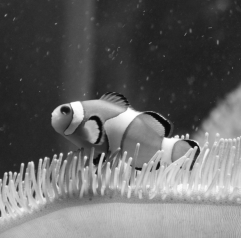

In [9]:
# Load in the clownfish image then convert to grayscale for testing
clownfish = Image.open('images/clownfish.png', 'r')
clownfish_gray = clownfish.convert('L')  # convert to grayscale
clownfish_gray

#### 1b (ii). Generate and plot Gabor filters

Run the following code to define and plot Gabor filters. You will uses these filters to test out your convolution.

Gabor filters are a broad class of kernels, and the following function generates those that approximate the receptive field of certain neurons (**simple cells**) in an area of the brain called primary visual cortex (V1). The equation comes from an analysis of the neurophysiological data by Lee (1996): 

http://leelab.cnbc.cmu.edu/publication/assets/links/ImageRepre.pdf

In [10]:
def gabor(filter_sz_xy, w, theta, K=np.pi):
    ''' Generates a simple cell-like Gabor filter.
    
    Parameters:
    -----------
    filter_sz_xy: tuple. shape=(filter width, filter height)
    w: float. spatial frequency of the filter
    theta: float. Angular direction of the filter in radians
    K: float. Angular phase of the filter in radians
    '''
    rad_x, rad_y = filter_sz_xy
    rad_x, rad_y = int(rad_x/2), int(rad_y/2)
    [x, y] = np.meshgrid(np.arange(-rad_x, rad_x+1), np.arange(-rad_y, rad_y+1))

    x_p = x*np.cos(theta) + y*np.sin(theta)
    y_p = -x*np.sin(theta) + y*np.cos(theta)
    
    # Take the real part of the filter
    gauss = w**2 / (4*np.pi*K**2) * np.exp(-(w**2/(8*K**2)) * (4*x_p**2 + y_p**2))
    sinusoid = np.cos(w*x_p) * np.exp(K**2/2)
    gabor = gauss * sinusoid
    return gabor


def plot_image_panel(imgs):
    fig, axes = plt.subplots(ncols=len(imgs), figsize=(3*len(imgs),6))
    if len(imgs) == 1:
        axes.imshow(imgs[0])
        axes.set_xticks([])
        axes.set_yticks([])
    else:
        for ax, img in zip(axes, imgs):
            ax.imshow(img)
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

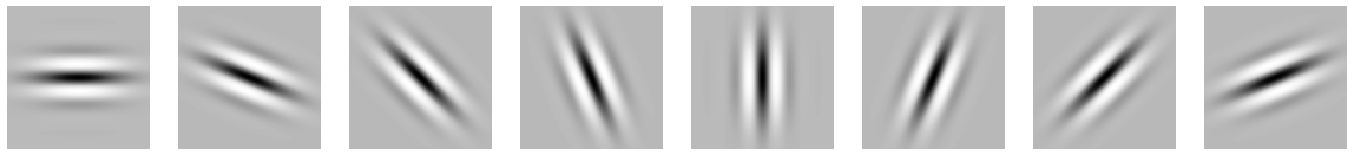

In [11]:
gabor_kers = []
for th in np.arange(-np.pi/2, np.pi/2, np.pi/8):
    gabor_kers.append(gabor(filter_sz_xy=[121, 121], w=0.25, theta=th))
plot_image_panel(gabor_kers)

#### 1b (iii). Create Gabor filters for convolution

These filters look nice, but their 121x121 size adds needless computation time (especially just to test your convolution function!).

Write code below that generates 4 Gabor filters that respond to vertical, horizontal, and $\pm$ 45 degree bar orientations with spatial frequency 2 and filter size (21, 21). Convert the list to a numpy array (`shape = (4, 21, 21)`).

Note: the `gabor` function assumes the angles are in radians, not degrees

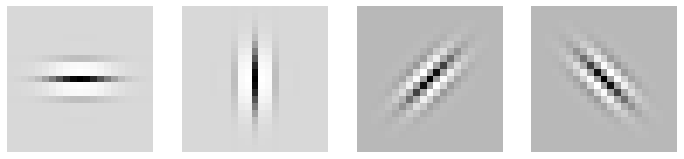

Test kernels have shape (4, 21, 21) and it should be (4, 21, 21)


In [12]:
# Set up test filters
gabor_kers = []
angles = [np.pi/2, np.pi, np.pi/4, -np.pi/4]
for th in angles:
    gabor_kers.append(gabor(filter_sz_xy=[21, 21], w=2, theta=th))
gabor_kers = np.asarray(gabor_kers)
plot_image_panel(gabor_kers)
print(f'Test kernels have shape {gabor_kers.shape} and it should be (4, 21, 21)')

#### 1b (iv). Questions

The following code should produce four images that look like the clown fish but on a gray background.

**Question 1:** What is each filter picking up in the image?

**Answer 1: The first filter picks up the corals on the ground. The second filter picks up corals, The third filter picks up the shape of the fish. The fourth filter picks up the shape of the fish. (Not sure about this question)** 

img_x=238, img_y=241
n_kers=4, ker_x=21, ker_y=21
Your filtered clown fish shape is (4, 238, 241) and it should be (4, 238, 241)


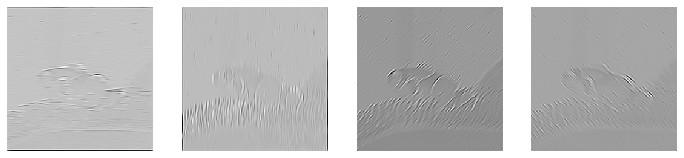

In [13]:
clownfish_gray_np = np.array(clownfish_gray)
clownfish_gray_out = conv2_gray(clownfish_gray_np, gabor_kers)
print(f'Your filtered clown fish shape is {clownfish_gray_out.shape} and it should be (4, 238, 241)')
plot_image_panel(clownfish_gray_out)

## Task 2: Multi-channel 2D Convolution (RGB color image filtering)

Once you have your grayscale convolution working, copy-and-paste your code into the more general function `conv2`.

The difference with this new function is that the `img` input has a leading dimension for color channel. For example, `(3, 200, 200)` for a color image and `(1, 200, 200)` for grayscale. 

It shouldn't take a great deal of work to modify your `conv2_gray` code for this new case. See the function docstring for some hints.

In [14]:
from filter_ops import conv2

### 2a. Preprocess color clownfish image

In the cell below, take the color clownfish image and convert it to a numpy array called `clownfish_np` (*this is the variable name is assumed by test code*). Drop the 4th color channel (alpha channel) so that ony RGB channels remain. Also, restructure the dimensions so that the color channel is first (*see below test code*). Before transposing the image dimensions, `plt.imshow` should give you an output that looks like this:

<img src="data/clownfish.png" width="200">

In [15]:
# Your code here
clownfish = Image.open('images/clownfish.png', 'r')
clownfish_np = np.array(clownfish)
clownfish_np = np.delete(clownfish_np, 3, 2)
clownfish_np = np.transpose(clownfish_np, (2, 0, 1))
print(f'Raw color clown fish image is {clownfish_np.shape} and should be (3, 238, 241)')

Raw color clown fish image is (3, 238, 241) and should be (3, 238, 241)


### 2b. Box filter test

Make a 11x11 box filter, with constant, identical positive values normalized so that the entire filter sums to 1.

Add a leading singleton dimension so shape is `(1, 11, 11)`

In [16]:
# filter with box kernels
box_ker_sz = 11
box_ker = np.ones([1, box_ker_sz, box_ker_sz])
box_ker /= box_ker.sum()
# three_kers = np.concatenate([sobel_ops, box_ker])
print(f'Test kernels shape is {box_ker.shape} and should be (1, 11, 11)')
print(f'box ker looks like\n{box_ker}')

Test kernels shape is (1, 11, 11) and should be (1, 11, 11)
box ker looks like
[[[0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]
  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]]]


In [17]:
clownfish_out = conv2(clownfish_np, box_ker, verbose=True)
print(f'Your filtered clown fish shape is {clownfish_out.shape} and it should be (1, 3, 238, 241)')

img_x=238, img_y=241
n_kers=1, ker_x=11, ker_y=11
Your filtered clown fish shape is (1, 3, 238, 241) and it should be (1, 3, 238, 241)


### 2c. Visualize output of RGB box filter convolution of clownfish image

In the cell below:

- Convert the convolution output to uint8.
- Permute the dimensions for visualization so that they are: `n_kers, img_y, img_x, n_chans` = (1, 238, 241, 3).
- Visualize using the `plot_image_panel` function, defined above.

If all goes well, you should see a blurrier version of the input image (seemingly smaller because of the way we're plotting it, but the colors should look right).

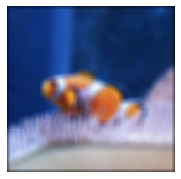

In [18]:
# Your code here
out = clownfish_out.astype(np.uint8)
out_t = np.transpose(out, (0,2,3,1))
plot_image_panel(out_t)

**Question 2:** What do you notice (other than the blurriness) that is different about this filtered image compared to the original? Why does this happen?

**Answer 2:** 

There is a dark edge around the image. It's the padded area that we producted in the covolution function. 

### 2d. Gabor filter color image test

Finally, we'll test your color convolution function with the gabor filters

In [19]:
clownfish_gabor_out = conv2(clownfish_np, gabor_kers)
print(f'Your filtered clown fish shape is {clownfish_gabor_out.shape} and it should be (4, 3, 238, 241)')

img_x=238, img_y=241
n_kers=4, ker_x=21, ker_y=21
Your filtered clown fish shape is (4, 3, 238, 241) and it should be (4, 3, 238, 241)


### 2e. Visualize output of RGB Gabor filter convolution of clownfish image

In the cell below:

- Normalize the convolution output based on the **dynamic range** of the image (the "CS251 way"). Do this normalization across RGB channels (i.e. the color channel dimension): for every pixel of every image, select the `min`/`max` values among each RGB triplet. Using `keepdims` might be useful here to do this without for loops.
- Scale the output to the range 0-255 within each color channel — i.e. the max of each RGB channel should be (255, 255, 255) for (R, G, B). 
- Permute the dimensions for visualization so that they are: `n_kers, img_y, img_x, n_chans`. The ultimate shape after your operations is `(4, 238, 241, 3)`
- Convert the output to uint8.
- Visualize using the `plot_image_panel` function, defined above.

If everything goes well, you should see a similar pattern as in your grayscale filtered images, but now with watercolor/stained glass-like psychedelic colors!

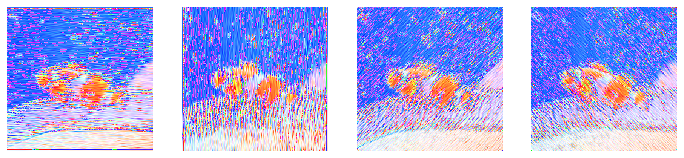

In [20]:
clownfish_gabor_out = clownfish_gabor_out / np.max(clownfish_gabor_out,axis=1,keepdims=True) * 255
# print(clownfish_color_imgs_out.shape)
plot_image_panel(np.rollaxis(clownfish_gabor_out,1,4).astype('uint8'))

### 2f. Neural net convolution

Now you're ready to implement the convolution function that we'll use in our convolutional neural network. Copy-and-paste your `conv2` code into `conv2nn` within `filter_ops.py` and make the modifications specified in the docstring.

In [21]:
from filter_ops import conv2nn

#### Test: Multiple images and Gabor filters

This test is simply to pass two copies of the clown fish image to `conv2nn`. The corresponding filtered images should look identical

In [22]:
imgs = np.stack([clownfish_np, clownfish_np])
bias = np.zeros(len(gabor_kers))
print(f'Test img shape is {imgs.shape}')

Test img shape is (2, 3, 238, 241)


In [23]:
# Make a new axis for color channel and replicate the Gabors across that channel so that each RGB channel
# is filtered by the same filters
gabor_kers_chans = np.tile(gabor_kers[:, np.newaxis, :, :], (3, 1, 1, ))
print(f'Test gabor filter shape is {gabor_kers_chans.shape}')

Test gabor filter shape is (4, 3, 21, 21)


batch_sz=2, n_chan=3, img_x=238, img_y=241
n_kers=4, n_ker_chans=3, ker_x=21, ker_y=21
Your filtered clown fish shape is (2, 4, 238, 241) and it should be (2, 4, 238, 241)
Your filter maps are identical as expected!


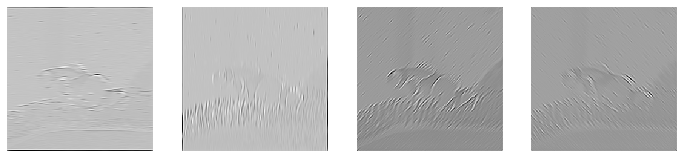

In [46]:
clownfish_color_imgs_out = conv2nn(imgs, gabor_kers_chans, bias)
print(f'Your filtered clown fish shape is {clownfish_color_imgs_out.shape} and it should be (2, 4, 238, 241)')
if np.all(clownfish_color_imgs_out[0] == clownfish_color_imgs_out[1]):
    print('Your filter maps are identical as expected!')
else:
    print('Your filter maps are not the same :(')

plot_image_panel(clownfish_color_imgs_out[0])

#### Test: Multiple images and Gabor filters with a different bias term

In [47]:
bias = 10*np.ones(len(gabor_kers_chans))
clownfish_color_imgs_out2 = conv2nn(imgs, gabor_kers_chans, bias)
print(f'Your filtered clown fish shape is {clownfish_color_imgs_out2.       shape} and it should be (2, 4, 238, 241)')
if np.all(clownfish_color_imgs_out2[0] == clownfish_color_imgs_out2[1]):
    print('Your filter maps are identical as expected!')
else:
    print('Your filter maps are not the same :(')
print(f'(bias test) The minimum value in your filtered images is {clownfish_color_imgs_out2.min():.2f} and it should be -6560.38')

batch_sz=2, n_chan=3, img_x=238, img_y=241
n_kers=4, n_ker_chans=3, ker_x=21, ker_y=21
Your filtered clown fish shape is (2, 4, 238, 241) and it should be (2, 4, 238, 241)
Your filter maps are identical as expected!
(bias test) The minimum value in your filtered images is -6560.38 and it should be -6560.38


## Task 3: 2D max pooling

We took care to preserve the spatial dimensions of the input image in our convolution operation. Convolutional networks often have a 'pyramid' shape, where the spatial dimensions reduce in size as you go deeper up the net. This is usually achieved with a pooling operation (usually max, like you will implement here, or mean), which complements the convolution. Convolution and pooling operations are often interdigitated layer-to-layer.

We will implement this function in two stages to help with the debugging.

### 3a. Implement max pooling and synthetic data tests

In `filter_ops.py` implement the `max_pool` function, then run the following test code.

In [27]:
from filter_ops import max_pool

#### Testing: Even checkerboard

In [28]:
# Create simple checkerboard pattern for testing.
# NOTE: We're creating an extra singleton dimension 
grid = np.tile(np.stack([np.array([1, 0]*5), np.array([0, 0]*5)]), (3, 1))
print(f'Image shape is {grid.shape}')
print(f'The checkerboard image looks like\n{grid}')

Image shape is (6, 10)
The checkerboard image looks like
[[1 0 1 0 1 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [29]:
grid_pooled = max_pool(grid)
print(f'Pooled image shape is {grid_pooled.shape} and it should be (5, 9)')
print(f'Here is your max filtered checkerboard. It should contain all ones:\n{grid_pooled}')

Pooled image shape is (5, 9) and it should be (5, 9)
Here is your max filtered checkerboard. It should contain all ones:
[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


Testing stride:

In [30]:
grid_pooled = max_pool(grid, strides=2)
print(f'Pooled image shape is {grid_pooled.shape} and it should be (3, 5)')
print(f'Here is your max filtered checkerboard. It should contain all ones:\n{grid_pooled}')

Pooled image shape is (3, 5) and it should be (3, 5)
Here is your max filtered checkerboard. It should contain all ones:
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


#### Testing: Odd checkerboard

In [31]:
# Create simple checkerboard pattern for testing
grid_odd = np.tile(np.stack([np.array([1, 0]*2), np.array([0, 0]*2), np.array([1, 0]*2)]), (3, 1))
print(f'Image shape is {grid_odd.shape}')
print(f'The odd checkerboard image looks like\n{grid_odd}')

Image shape is (9, 4)
The odd checkerboard image looks like
[[1 0 1 0]
 [0 0 0 0]
 [1 0 1 0]
 [1 0 1 0]
 [0 0 0 0]
 [1 0 1 0]
 [1 0 1 0]
 [0 0 0 0]
 [1 0 1 0]]


In [32]:
grid_pooled = max_pool(grid_odd)
print(f'Pooled image shape is {grid_pooled.shape} and it should be (8, 3)')
print('Here is your max filtered checkerboard. It should contain all ones:')
print(f'Here is your odd max filtered checkerboard. It should contain all ones:\n{grid_pooled}')

Pooled image shape is (8, 3) and it should be (8, 3)
Here is your max filtered checkerboard. It should contain all ones:
Here is your odd max filtered checkerboard. It should contain all ones:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Testing stride:

In [33]:
grid_pooled = max_pool(grid_odd, strides=2)
print(f'Pooled image shape is {grid_pooled.shape} and it should be (4, 2)')
print(f'Here is your max filtered checkerboard. It should contain all ones:\n{grid_pooled}')

Pooled image shape is (4, 2) and it should be (4, 2)
Here is your max filtered checkerboard. It should contain all ones:
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


#### Testing: bars

In [34]:
# Create simple bar pattern for testing
bars = np.tile(np.stack([np.array([1]*10), np.array([0]*10), np.array([0]*10), np.array([0]*10)]), (3, 1))
print(f'Image shape is {bars.shape}')
print(f'Here are your bar inputs:\n{bars}')

Image shape is (12, 10)
Here are your bar inputs:
[[1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [36]:
bars_pooled = max_pool(bars)
print(f'Pooled image shape is {bars_pooled.shape} and it should be (11, 9)')
print(f'Here are your max filtered bars:\n{bars_pooled}')

Pooled image shape is (11, 9) and it should be (11, 9)
Here are your max filtered bars:
[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Here is what it should look like:

    [[1. 1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Testing stride of 2:

In [35]:
bars_pooled = max_pool(bars, strides=2)
print(f'Pooled image shape is {bars_pooled.shape} and it should be (6, 5)')
print(f'Here are your max filtered bars:\n{bars_pooled}')

Pooled image shape is (6, 5) and it should be (6, 5)
Here are your max filtered bars:
[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]


Here is what it should look like:

    [[1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]]

Testing stride of 3:

In [37]:
bars_pooled = max_pool(bars, strides=3)
print(f'Pooled image shape is {bars_pooled.shape} and it should be (4, 3)')
print(f'Here are your max filtered bars:\n{bars_pooled}')

Pooled image shape is (4, 3) and it should be (4, 3)
Here are your max filtered bars:
[[1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]


Here is what it should look like:

    [[1. 1. 1.]
     [1. 1. 1.]
     [0. 0. 0.]
     [0. 0. 0.]]

Testing pooling size of 3:

In [38]:
bars_pooled = max_pool(bars, pool_size=3)
print(f'Pooled image shape is {bars_pooled.shape} and it should be (10, 8)')
print(f'Here are your max filtered bars:\n{bars_pooled}')

Pooled image shape is (10, 8) and it should be (10, 8)
Here are your max filtered bars:
[[1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


Here is what it should look like:

    [[1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [1. 1. 1. 1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0. 0. 0. 0.]]

### 3b. Implement and test `max_poolnn`

Add mini-batch and color channel support to your `max_pool` function. Copy-and-paste your max pooling code into `max_poolnn` to get started. Check your implementation with the following test code.

In [39]:
from filter_ops import max_poolnn

#### Test: Simple bars

Testing pooling size of 2 and stride 2

In [40]:
# Create simple bar pattern for testing
bars_batch = np.tile(np.stack([np.array([1]*10), np.array([0]*10), np.array([0]*10), np.array([0]*10)]), (1, 1, 3, 1))
print(f'Image shape is {bars_batch.shape}')
print(f'Here are your bar inputs:\n{bars_batch[0,0]}')

Image shape is (1, 1, 12, 10)
Here are your bar inputs:
[[1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [41]:
bars_batch_pooled = max_poolnn(bars_batch, strides=2, pool_size=2)
print(f'Pooled image shape is {bars_batch_pooled.shape} and it should be (1, 1, 6, 5)')
print(f'Here are your max filtered bars:\n{bars_batch_pooled[0,0]}')

img_x=10, img_y=12, pool_size=2, strides=2
Pooled image shape is (1, 1, 6, 5) and it should be (1, 1, 6, 5)
Here are your max filtered bars:
[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]


Here is what it should look like:

    [[1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]
     [1. 1. 1. 1. 1.]
     [0. 0. 0. 0. 0.]]

#### Test on real image

In the cell below, take your color clownfish image in numpy array format and add a leading singleton for the batch dimension. The following test code assumes the variable is called `clownfish_np_batch`.

In [42]:
# Load in the clownfish image then convert to grayscale for testing
clownfish = Image.open('images/clownfish.png', 'r')
clownfish = np.array(clownfish)
clownfish = np.delete(clownfish,3,2)
clownfish = np.transpose(clownfish, (2,0,1))
#add a leading singleton to the batch dimension
clownfish_np_batch = np.expand_dims(clownfish, axis = 0)

print(f'Shape of clownfish image is {clownfish_np_batch.shape}')

Shape of clownfish image is (1, 3, 238, 241)


In [43]:
clownfish_mp = max_poolnn(clownfish_np_batch, pool_size=8)
print(f'Pooled image shape is {clownfish_mp.shape} and it should be (1, 3, 231, 234)')

img_x=241, img_y=238, pool_size=8, strides=1
Pooled image shape is (1, 3, 231, 234) and it should be (1, 3, 231, 234)


### 3c. Visualize output of max pooling of clownfish image

In the cell below:

- Permute the dimensions of `img_pooled` so that it is `batch, img_y, img_x, n_chans` = (1, 231, 234, 3).
- Convert the output to uint8.
- Visualize using the `plot_image_panel` function, defined above.

If everything goes well, it should look like a blocky version of the original image (with color).

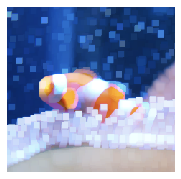

In [44]:
#permute the dimensions
img_pooled = np.transpose(clownfish_mp, (0,2,3,1))
#convert the output to unint 8
img_pooled = img_pooled.astype(np.uint8)
#visualize the image
plot_image_panel(img_pooled)